In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('fcc-forum-pageviews.csv')

df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [6]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [29]:
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

df

,value
date,
2016-06-20,28508.0
2016-06-21,26805.0
2016-06-27,24278.0
2016-06-29,27734.0
2016-06-30,26696.0
...,...
2019-11-03,130118.0
2019-11-09,115642.0
2019-11-10,117717.0


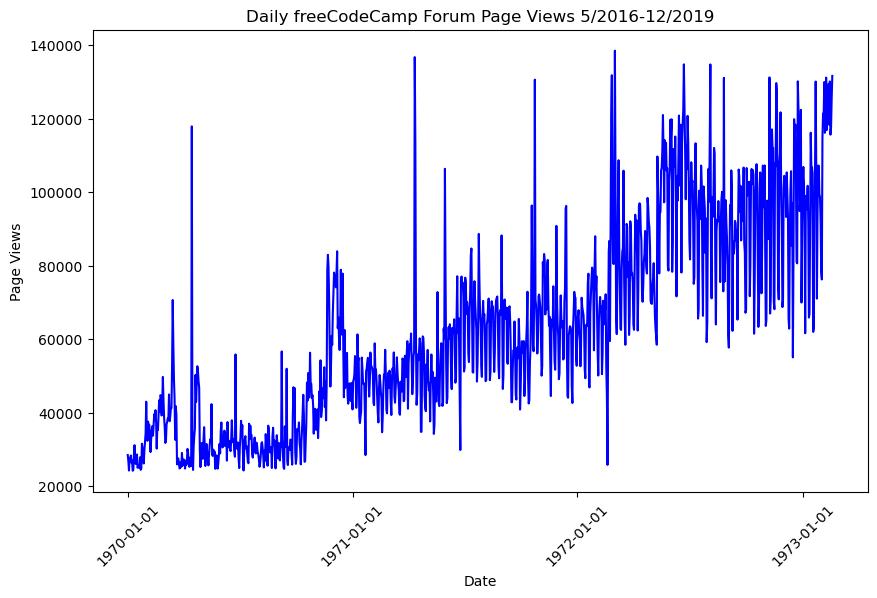

In [47]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], color='blue')

plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show a tick for each month
plt.xticks(rotation=45)

plt.show()

In [63]:
df['year'] = df.index.year
df['month'] = df.index.month
df

,value,year,month
date,,,
2016-05-09,1201,2016,5
2016-05-10,2329,2016,5
2016-05-11,1716,2016,5
2016-05-12,10539,2016,5
2016-05-13,6933,2016,5
...,...,...,...
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11
2019-12-01,142918,2019,12


In [66]:
monthly_average = df.groupby(['year', 'month'])['value'].mean().unstack()

monthly_average

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,11242.695652,19124.366667,23314.225806,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,112592.000000,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,162402.600000,100804.451613,117991.032258,97268.833333,150862.709677,181026.700000,173870.333333


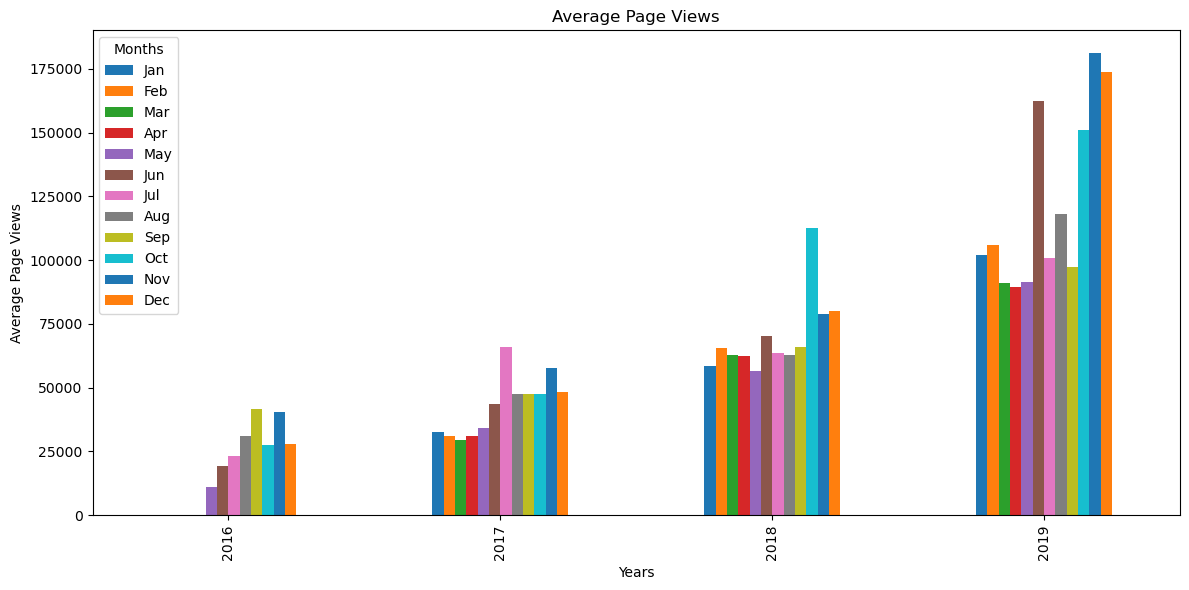

In [74]:
monthly_average.plot(kind='bar', figsize=(12, 6))

plt.title('Average Page Views')
plt.xlabel('Years')
plt.ylabel('Average Page Views')

plt.legend(title='Months', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

/var/folders/w9/jd1t0s5n6s5ffg5tz2s5qmrc0000gn/T/ipykernel_32679/2218218459.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='value', data=df, palette='coolwarm')
/var/folders/w9/jd1t0s5n6s5ffg5tz2s5qmrc0000gn/T/ipykernel_32679/2218218459.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='value', data=df, palette='Set2')


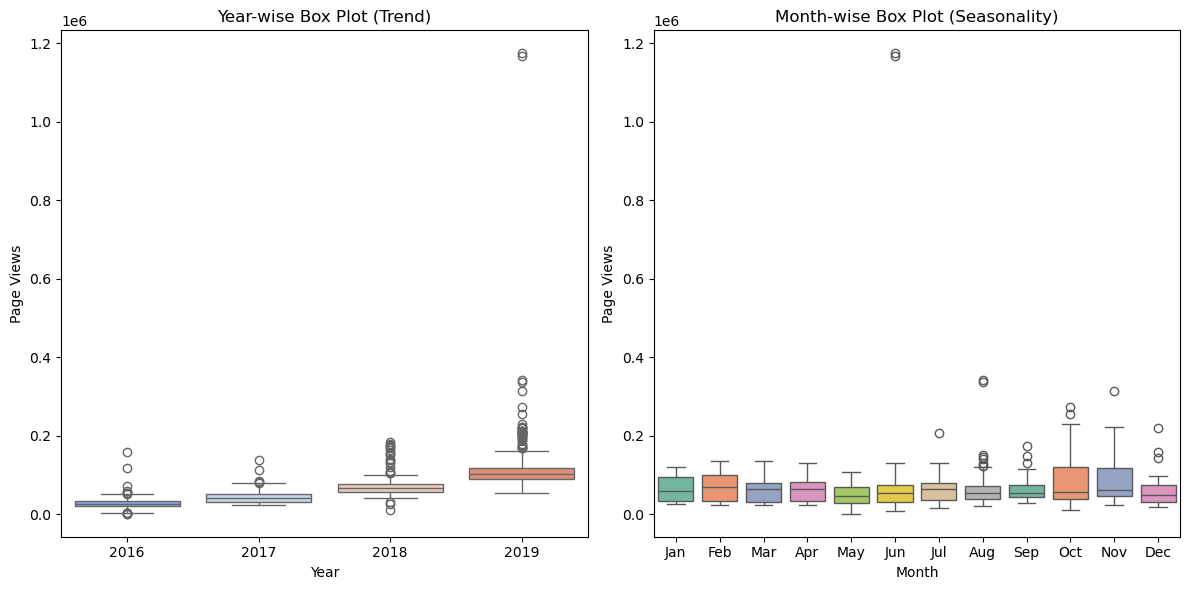

In [89]:
import seaborn as sns

df['year'] = df.index.year
df['month'] = df.index.month

plt.figure(figsize=(12, 6))

# Create the year-wise box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='value', data=df, palette='coolwarm')
plt.title('Year-wise Box Plot (Trend)')
plt.xlabel('Year')
plt.ylabel('Page Views')

# plt.show()

plt.subplot(1, 2, 2)
sns.boxplot(x='month', y='value', data=df, palette='Set2')
plt.title('Month-wise Box Plot (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Page Views')

plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

